In [15]:
import pandas as pd
import json
from matplotlib import pyplot as plt


with open('data_full.json') as json_file: 
    data_dict = json.load(json_file) 

print(data_dict.keys())

dict_keys(['oos_val', 'val', 'train', 'oos_test', 'test', 'oos_train'])


In [16]:
train_data = data_dict['train']
val_data = data_dict['val']
test_data = data_dict['test']

oos_train = data_dict['oos_train']
oos_val = data_dict['oos_val']
oos_test = data_dict['oos_test']


train_df = pd.DataFrame(train_data, columns =['query', 'intent'])
val_df = pd.DataFrame(val_data, columns =['query', 'intent'])
test_df = pd.DataFrame(test_data, columns =['query', 'intent'])

#print(train_df.head())
# grouping
#train_df.groupby("intent").count().to_excel('ds_grouped.xlsx',sheet_name="Sheet1")

The paper related to this dataset is from November 2018, so the genre of the dataset is modern and the language used is English.

The provided dataset contains 23,700 queries, including 22,500 in-scope queries covering 150 intents, which can be grouped into 10 general domains. For each intent, there are 100 training, 20 validation and 30 testing queries.  

The dataset also included 1,200 out-of-scope queries. Of the 1,200 out-of-scope queries collected, 100 are used for validation and 100 are used for training, leaving 1,000 for testing.

Therefore, the dataset is very balanced between in-scope intent classes. Instead, it's very unbalanced between in-scope and out-of-scope training samples because we have 15,000 in-scope queries and only 100 out-of-scope queries. But if we consider out-of-scope as an intent class we have a dataset with 151 intents and very balanced. 

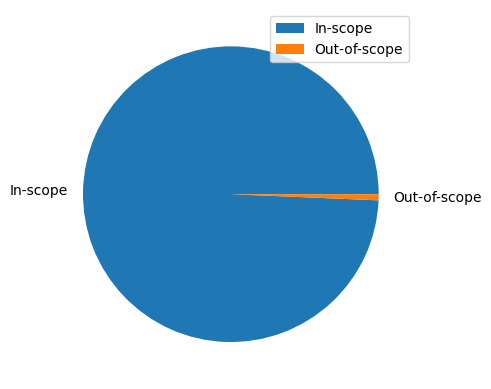

In [19]:
plt.pie([len(train_data), len(oos_train)],labels=['In-scope', 'Out-of-scope'])
plt.legend(loc='upper right')
plt.show()



The in-scope queries were collected using a scoping crowdsourcing task, which prompted crowd workers to provide questions and commands related to topic domains in the manner they would interact with an artificially intelligent assistant. Then data generated by scoping task were manually grouped into intents. 

Out-of-scope queries were collected in two ways. First, using worker mistakes: queries written for
one of the 150 intents that did not actually match any of the intents. Second, using scoping and
scenario tasks with prompts based on topic areas found on Quora, Wikipedia, and elsewhere. 

For all queries collected, all tokens were downcased, and all end-of-sentence punctuation was removed.
Additionally, all duplicate queries were removed and replaced.
Trying to reduce bias in the in-scope data, all queries from a given crowd worker were placed in
a single split (train, validation, or test). This avoids the potential issue of similar queries from a crowd worker ending up in both the train and test sets,for instance, which would make the train and test
distributions unrealistically similar.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords

# concatenating validation and train set
frames = [train_df,val_df]
train_val_df = pd.concat(frames)

intent_class=["fun_fact","replacement_card_duration","time","maybe","car_rental"]

fun_fact = train_val_df[train_val_df['intent']==intent_class[0]]
fun_fact_list = fun_fact['query'].tolist()


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(fun_fact_list).toarray()



tokens_list = []
wordcloud = WordCloud().generate(" ".join(fun_fact_list))
tokens = word_tokenize(" ".join(fun_fact_list))
tokens_list=[w for w in tokens if w not in list(stopwords.words('english'))]
c = Counter(tokens_list)
most_common = c.most_common(10)

print("Number of types:",len(set(tokens_list)))
print("Most common type:",most_common)

feats = [feat[0] for feat in most_common]
counts = [count[1] for count in most_common]

plt.bar(feats,counts)
plt.xticks(rotation=30, ha='right')


plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [ ]:

vectorizer = CountVectorizer(ngram_range=(2,2))
X = vectorizer.fit_transform([" ".join(fun_fact_list)]).toarray()

print(X.shape)
